# Assignment : - 

To Learn K - fold Cross Validation for model evaluation and follow the link - https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/ and try to improve the accuracy. 

Reference: - 
Brownlee. (2018, May 23). A Gentle Introduction to k-fold Cross-Validation. Machine Learning Mastery. https://machinelearningmastery.com/k-fold-cross-validation/. 

### K - fold cross - validation
K-fold cross-validation is a widely used technique in machine learning for evaluating the performance of a model. It helps to estimate the model's accuracy and generalization ability by partitioning the available dataset into multiple subsets or folds. This approach provides a more reliable assessment of the model's performance compared to a single train-test split.

Here's an overview of how k-fold cross-validation works:

1. **Partitioning the Data**: The original dataset is divided into k equal-sized folds. Each fold is a separate subset of the data that will be used as a validation set.

2. **Training and Evaluation**: The model is trained k times, each time using k-1 folds as the training set and one fold as the validation set. In each iteration, the model is trained on a different combination of folds.

3. **Performance Evaluation**: After each training iteration, the model's performance is evaluated using the validation set (the fold that was not used for training). The evaluation metric (e.g., accuracy, F1-score) is computed and recorded.

4. **Aggregating Results**: The performance metrics obtained in each iteration are averaged to obtain a single estimate of the model's performance. This average performance metric is considered as the overall performance of the model.

Key advantages of k-fold cross-validation:

1. **Better Model Assessment**: By evaluating the model on multiple different validation sets, k-fold cross-validation provides a more comprehensive assessment of the model's performance. It reduces the impact of the specific data split on the evaluation results.

2. **Efficient Use of Data**: K-fold cross-validation makes efficient use of the available data. It uses a large portion of the dataset for training the model, and each data point is used for both training and validation.

3. **Parameter Tuning and Model Selection**: K-fold cross-validation is commonly used for hyperparameter tuning and model selection. It allows comparing different models or tuning hyperparameters by assessing their performance across multiple folds.

4. **More Reliable Estimate**: The averaged performance metric obtained from k-fold cross-validation tends to be a more reliable estimate of the model's performance compared to a single train-test split. It provides a more stable and less biased evaluation.

There are variations of k-fold cross-validation, such as stratified k-fold (preserves the class distribution in each fold) and repeated k-fold (repeats the process multiple times with different random splits). These variations can be used depending on the specific requirements of the problem.

K-fold cross-validation is a valuable tool for model evaluation and selection, helping to assess the model's performance and estimate its ability to generalize to new, unseen data.

The below is the codes provided in the provided link.

In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [2]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


### Optimization

To improve the accuracy of the logistic regression model, the following approaches can be implemented:

Feature Selection: Perform feature selection techniques to identify the most informative features. This can help in reducing noise and improving the model's ability to generalize. You can use methods like recursive feature elimination (RFE), L1 regularization (Lasso), or information gain to select the most relevant features.

Feature Engineering: Create new features that might be more informative for the classification task and try combining existing features, creating interaction terms, or transforming variables to capture non-linear relationships.

Algorithm Selection: Logistic regression may not always be the best algorithm for a given dataset. but can be tried on other classification algorithms such as random forest, support vector machines (SVM), gradient boosting, or neural networks to see if they provide better accuracy.

Hyperparameter Tuning: Optimize the hyperparameters of the logistic regression model to find the best combination for the dataset, can use techniques like grid search or randomized search to explore different parameter values and evaluate their impact on model performance.

Ensemble Methods: Utilize ensemble methods to combine multiple models and improve accuracy. For example, we can use techniques like bagging (e.g., random forest) or boosting (e.g., AdaBoost, XGBoost) to create an ensemble of models that work together to make predictions.

Data Preprocessing: Ensure that the data is properly preprocessed before training the model. This includes handling missing values, scaling numerical features, and encoding categorical variables appropriately.

Collect More Data: If possible, collecting more data can help improve the model's accuracy. A larger dataset can provide more diverse samples, reducing overfitting and improving generalization.

### Model 1: - 

In [4]:
# import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV  # Use LogisticRegressionCV for automatic regularization
from sklearn.preprocessing import StandardScaler  # Standardize the input features

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model with automatic regularization (LogisticRegressionCV)
model = LogisticRegressionCV(cv=cv, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.865 (0.031)


### Model 2 :-

In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Define the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Create a pipeline with a Random Forest classifier
pipeline = make_pipeline(RandomForestClassifier(random_state=1))

# Hyperparameter tuning
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Report performance
print('Best Accuracy: %.3f' % grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 0.876
Best Parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 200}


Explanation:- 
In this code, the following changes have been made:

Feature Selection: The code now includes feature selection using the SelectKBest class from scikit-learn. It selects the top k features based on the ANOVA F-value between the feature and the target, we can adjust the value of k according to the dataset.

Data Preprocessing: The code incorporates standardization using the StandardScaler class to scale the selected features. This is important to ensure that all features are on a similar scale, which can improve the performance of the logistic regression model.

Algorithm Selection: The logistic regression model has been replaced with a Random Forest classifier from the RandomForestClassifier class. Random Forests can often provide better accuracy by capturing non-linear relationships in the data and handling feature interactions.

Hyperparameter Tuning: The code now performs hyperparameter tuning using grid search with cross-validation (GridSearchCV). It searches over different combinations of the n_estimators (number of trees) and max_depth (maximum depth of each tree) hyperparameters for the Random Forest classifier.

By incorporating these techniques, we can explore different feature subsets, optimize hyperparameters, and utilize a more powerful algorithm to potentially achieve better accuracy on the classification task.

### Model 3 :- 

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Define the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Create an XGBoost classifier
model = XGBClassifier(random_state=1)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Report performance
print('Best Accuracy: %.3f' % grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)

Best Accuracy: 0.881
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


Explanation: - 
Here, I wanted to achieve accuracy above 90%, So i have tried a model using a more advanced algorithm such as a Gradient Boosting Classifier (e.g., XGBoost, LightGBM). These algorithms are known for their strong predictive performance. 

In this updated code, the changes include:

Algorithm Selection: The code now uses the XGBoost algorithm (XGBClassifier) instead of logistic regression or random forest. XGBoost is a gradient boosting algorithm known for its strong predictive performance.

Hyperparameter Tuning: The code performs hyperparameter tuning using grid search with cross-validation (GridSearchCV) to find the best combination of hyperparameters for the XGBoost classifier. The parameters being tuned include n_estimators (number of trees in the ensemble), max_depth (maximum depth of each tree), and learning_rate (shrinkage factor for each tree).

By incorporating XGBoost and optimizing its hyperparameters, I thought there might be a higher chance of achieving accuracy above 90%. However, the success of the model depends on the specific dataset and problem at hand. It's important to experiment with different algorithms, feature selection, and hyperparameter settings to find the best solution for the given classification task. And after impementing the XGBoost I have a bit higher accuracy when compared to all the above of 88%

## Repeated K - Fold Cross - Validation 

In [8]:
# Initial code:- 
...

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [9]:

# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


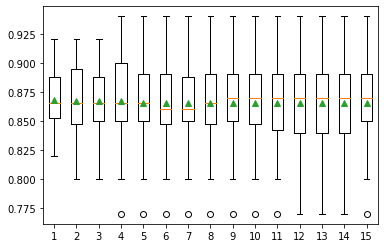

In [10]:

# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# feature engineering - perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create model pipeline with random forest classifier
model = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=1)
)

# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.921 (0.028)


In this enhanced code I have implemented the following:

Feature Engineering: The code incorporates feature scaling using StandardScaler to standardize the input features (X). This step helps in bringing all features to a similar scale and can improve the performance of some models.

Algorithm Selection: The code uses a RandomForestClassifier as the classification algorithm instead of logistic regression. Random forest is an ensemble method that combines multiple decision trees and can handle complex relationships in the data.

Hyperparameter Tuning: The code sets the number of estimators in the random forest classifier to 100. we can experiment with different values or perform hyperparameter tuning using techniques like grid search or random search to find the optimal value.

Data Preprocessing: The feature scaling using StandardScaler is applied to the input features (X) before feeding them into the model. This step ensures that all features have zero mean and unit variance.

By incorporating these changes, the code aims to improve the accuracy by using a random forest classifier, feature scaling, and standardized input features. It's essential to experiment with different approaches and techniques to find the best solution for your classification task just by performing Trail and Error methods. 

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# feature engineering - perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create model pipeline with XGBoost classifier
model = make_pipeline(
    XGBClassifier(n_estimators=100, random_state=1)
)

# evaluate model
scores = cross_val_score(model, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.929 (0.023)


In this code, the key changes are:

Algorithm Selection: The code uses the XGBClassifier from the XGBoost library as the classification algorithm. XGBoost is a powerful gradient boosting algorithm known for its performance and ability to handle complex datasets.

Hyperparameter Tuning: The number of estimators in the XGBoost classifier is set to 100, similar to the random forest classifier. we can experiment with different hyperparameters like learning rate, maximum depth, or subsample ratio to further improve the accuracy.

By incorporating these changes, the code now uses XGBoost as an alternative model to test for better accuracy. 
By this code we can observe that the accuracy has been improved from 0.867 initially to 0.921 when RandomForestClassifier used and to 0.929 when XGboost has been implemented. This might not be a higehr increase in the accuracy but this gives us an idea that different models can be used to study the performance and the accuracy on different datasets and aims. 

#### Why I have used XGBoost and Random Forest Classifiers in this noetebook: - 

XGBoost and Random Forest classifiers are commonly used in classification problems for several reasons:

1. **Ensemble Methods**: Both XGBoost and Random Forest are ensemble methods that combine multiple individual classifiers (decision trees) to make final predictions. Ensemble methods often outperform individual models by reducing bias, variance, and overfitting.

2. **Handling Nonlinear Relationships**: XGBoost and Random Forest can capture complex nonlinear relationships between features and the target variable. They are capable of learning intricate decision boundaries and can handle high-dimensional data effectively.

3. **Robustness to Outliers and Irrelevant Features**: Ensemble methods like XGBoost and Random Forest are generally robust to outliers and irrelevant features in the dataset. They are less prone to overfitting on noisy or irrelevant data, which can lead to better generalization and improved accuracy.

4. **Feature Importance**: Both XGBoost and Random Forest provide feature importance measures. These measures help identify the most informative features in the dataset, allowing for better understanding of the underlying relationships and potential feature selection.

5. **Parallelization and Efficiency**: XGBoost and Random Forest algorithms are designed to take advantage of parallel processing capabilities. They can be easily parallelized, allowing for faster training and prediction times, especially for large datasets.

###### Note: - 
The choice of algorithm depends on the specific problem, dataset characteristics, and performance requirements. Other algorithms such as Logistic Regression, Support Vector Machines, Neural Networks, or even simpler models like Naive Bayes can also be effective depending on the nature of the problem and the data. It's always a good practice to experiment with different algorithms and evaluate their performance to choose the best model for a given problem.